<a href="https://www.kaggle.com/code/fizcogar/intro-ia-5-nlp-1?scriptVersionId=115882856" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introducción a la Inteligencia Artificial
## Aprendizaje Profundo
### Procesamiento de Lenguaje Natural (NLP)


## Modelos de lenguaje y aprendizaje autosupervisado
Un modelo de aprendizaje profundo dedicado a NLP se denomina **'Modelo de lenguaje'**.

La funcionalidad básica de un modelo de lenguaje es **predecir la palabra que sigue a un texto**. Al entrenarlo para hacer esa tarea, el modelo 'aprende' gran cantidad de cosas **acerca del texto de entrenamiento**. Esto sirve para afinarlo después para otros modelos de lenguaje y/o aplicaciones concretas.

> Una vez más, **Transferencia de Aprendizaje**

El entrenamiento para la funcionalidad básica de predecir la siguiente palabra es un tipo de **aprendizaje supervisado** denominado **aprendizaje autosupervisado**, porque no se necesita proporcionar el **objetivo del modelo** (la salida, la Y) por lo que es **muy fácil** construir el conjunto de datos de entrenamiento.

El conjunto de datos de entrenamiento se genera **automáticamente**. Supongamos que tenemos una red neuronal de **tres entradas y una salida**:

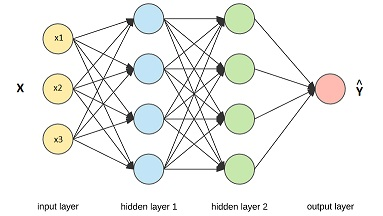

Imagina que este texto de J. R. R. Tolkien es parte del 'dataset' de entrenamiento:

> Este libro trata principalmente de los Hobbits, y el lector descubrirá en
> sus páginas mucho del carácter y algo de la historia de este pueblo. Podrá
> encontrarse más información en los extractos del Libro Rojo de la Frontera del
> Oeste que ya han sido publicados con el título de El Hobbit.

El conjunto de datos de entrenamiento sería el siguiente, con **tres entradas y una salida**:

| x1 | x2 | x3 | y |
| --- | --- | --- | --- |
| Este | | | libro |
| Este | libro | | trata |
| Este | libro | trata | principalmente |
| libro | trata | principalmente | de |
| trata | principalmente | de | los |
| principalmente | de | los | Hobbits |
| ... | ... | ... | ... |
| título | de | El | Hobbit |





## Afinado de un Modelo de Lenguaje Universal

El modelo que vamos a usar es un modelo preentrenado con textos en **castellano**, [GPT2-small-spanish](https://huggingface.co/datificate/gpt2-small-spanish) 

> "GPT2-small-spanish is a state-of-the-art language model for Spanish based on the GPT-2 small model.
>
>It was trained on Spanish Wikipedia using Transfer Learning and Fine-tuning techniques. The training took around 70 hours with four GPU NVIDIA GTX 1080-Ti with 11GB of DDR5 and with around 3GB of (processed) training data.
>
>It was fine-tuned from the English pre-trained GPT-2 small using the Hugging Face libraries (Transformers and Tokenizers) wrapped into the fastai v2 Deep Learning framework. All the fine-tuning fastai v2 techniques were used."

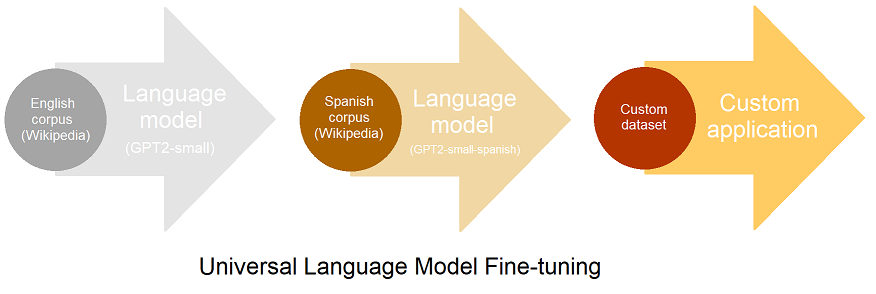



El modelo preentrenado [GPT2-small-spanish](https://huggingface.co/datificate/gpt2-small-spanish) está publicado por 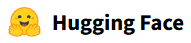 

**Huggingface** es una compañía norteamericana que desarrolla herramientas para aprendizaje máquina. Es muy conocida por su librería de **transformadores**, arquitectura de redes neuronales aplicable a NLP e Imagen Digital. Los transformers están detrás de aplicaciones como [DALLE-E 2](https://openai.com/dall-e-2), o GPT-3, el modelo de lenguaje detrás del famoso 'chatboot' [ChatGPT](https://chat.openai.com/chat).

Además, publica gran cantidad de 'datasets' para entrenar modelos y modelos ya preentrenados:

* https://huggingface.co/datasets
* https://huggingface.co/models

# Funcionalidad básica 

Sin 'afinado' el modelo puede ser utilizado para **predecir la palabra que sigue a un texto**.

La librería de Huggin Face descarga automáticamente de Internet el modelo preentrenado:

In [1]:
import torch
from transformers import GPT2LMHeadModel, GPT2TokenizerFast, logging

#logging.set_verbosity_info()
logging.set_verbosity_error()

pretrained_weights = 'datificate/gpt2-small-spanish'

tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/620 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/830k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/496k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/387 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/817 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/487M [00:00<?, ?B/s]

Ahora definimos una función que llama al método ``generate`` del modelo para generar las siguientes palabras a partir de un texto:

In [2]:
def generar(str, tokenizer, model, num_words):
    t = torch.LongTensor(tokenizer.encode(str))[None]
    preds = model.generate(t, num_words)
    return tokenizer.decode(preds[0].numpy())

## Inferencia

Llamamos a la función para generar la siguiente palabra:

In [3]:
generar('Estoy en la biblioteca leyendo un', tokenizer, model, 1)

'Estoy en la biblioteca leyendo un libro'